In [21]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
ur = "https://launchlibrary.net/1.4/launch/"
#rock = requests.get(url).json()
sdata = pd.read_csv("Rocket_names_modified.csv")
sdata.head()

,rocket name
0,Sputnik
1,Vanguard
2,Explorer
3,NOTS
4,Pioneer


In [22]:
name = []
date = []
o_name = []
sf = []
reason_f = []
lat = []
lng = []
for r in sdata['rocket name']:
    url = ur + str(r)
    rock = requests.get(url).json()
    try:
        
        for f in range(len(rock['launches'])):
            temp_name = str(rock["launches"][f]['name'])
            temp_date = str(rock['launches'][f]['windowend'])
            temp_o_name = (str(rock['launches'][f]['lsp']['name']))
            temp_lat = (float(rock["launches"][f]["location"]["pads"][0]["latitude"]))
            temp_lng = float(rock["launches"][f]["location"]["pads"][0]["longitude"])
            if str(rock["launches"][f]['failreason']) != "None":
                temp_reason_f = str(rock["launches"][f]['failreason'])
                temp_sf = "F"
            else:
                temp_sf = "S"
                temp_reason_f = "Na"
            name.append(temp_name)
            date.append(temp_date)
            o_name.append(temp_o_name)
            sf.append(temp_sf)
            reason_f.append(temp_reason_f)
            lat.append(temp_lat)
            lng.append(temp_lng)
    except KeyError:
        pass
        
        
rocksf = {"rockets name": name, "organization name": o_name, "date": date,"lat": lat, "lng": lng,
          "S/F": sf, "reason for failure": reason_f}
#for key in rocksf:
#    print(key)
#    print(len(rocksf[key]))
#    print()
rocksf = pd.DataFrame(rocksf)
rocksf

,rockets name,organization name,date,lat,lng,S/F,reason for failure
0,Pegasus XL | Fast Auroral Snapshot Explorer (F...,Orbital Sciences Corporation,"August 21, 1996 09:47:00 UTC",34.732778,-120.568056,S,Na
1,Pegasus XL | High Energy Transient Explorer (H...,Orbital Sciences Corporation,"November 4, 1996 17:08:00 UTC",37.938611,-75.457222,F,Battery failure in the Pegasus XL rocket third...
2,Pegasus XL | Broadband Advanced Technologies S...,Orbital Sciences Corporation,"February 26, 1998 07:07:00 UTC",34.732778,-120.568056,S,Na
3,Pegasus XL | Transition Region and Coronal Exp...,Orbital Sciences Corporation,"April 2, 1998 02:42:00 UTC",34.732778,-120.568056,S,Na
4,Pegasus XL | Wide Field Infrared Explorer (WIRE),Orbital Sciences Corporation,"March 5, 1999 02:56:00 UTC",34.732778,-120.568056,S,Na
5,Pegasus Hybrid | High Energy Transient Explore...,Orbital Sciences Corporation,"October 9, 2000 05:38:00 UTC",8.716667,167.733333,S,Na
6,Pegasus XL | Galaxy Evolution Explorer (GALEX),Orbital Sciences Corporation,"April 28, 2003 12:00:00 UTC",28.455556,-80.527778,S,Na
7,Pegasus XL | Interstellar Boundary Explorer (I...,Orbital Sciences Corporation,"October 19, 2008 17:47:23 UTC",8.716667,167.733333,S,Na
8,Pegasus XL | Ionospheric Connection Explorer (...,Northrop Grumman Innovation Systems,"November 19, 2018 08:05:00 UTC",28.455556,-80.527778,S,Na
9,Ariane 5 ECA | JUICE (JUpiter ICy moons Explorer),Arianespace,"January 1, 2022 00:00:00 UTC",5.239000,-52.768000,S,Na


In [23]:
#rocksf.loc[rocksf['S/F'] == 'F'].count()
rocksf['S/F'].value_counts()

S    510
F     46
Name: S/F, dtype: int64

In [24]:
rocksf.to_csv("rocket_launch.csv")


2009.0    8
2007.0    6
1996.0    5
2010.0    5
2008.0    3
2006.0    3
2017.0    2
1994.0    2
1995.0    2
1974.0    2
2004.0    2
2000.0    1
2019.0    1
2014.0    1
1991.0    1
2001.0    1
2011.0    1
Name: year, dtype: int64


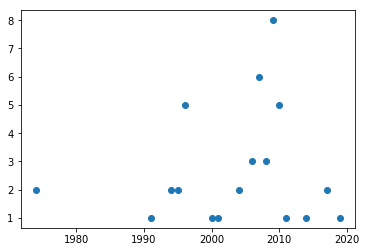

In [66]:
rock_fails = rocksf.loc[rocksf['S/F'] == 'F']
date = [ i for i in rock_fails['date']]
year = []
for y in date:
    for s in y.split(): 
        if s.isdigit():
            year.append(float(s))

year = {'year': year}
year = pd.DataFrame(year)
print(year['year'].value_counts())
#print(year['year'].groupby().count())

plt.plot(year['year'].value_counts(), marker = 'o', linewidth=0)
plt.show()

In [69]:
rock_fails['rockets name'].value_counts()

Pegasus XL | High Energy Transient Explorer (HETE) & Satelite de Aplicaciones Cientificas-B (SAC-B)    4
Proton-M/Blok DM-03 Enhanced | 3 x Glonass-M (Kosmos 2488, Kosmos 2489, Kosmos 2490)                   2
Delta IV Heavy | Demosat and 3CS-1 & 2                                                                 2
Atlas V 401 | NROL-30 & NOSS-3 (USA-194)                                                               2
Pegasus XL | Space Test Experiments Platform 1 (STEP-1)                                                2
Titan IIIE | Sphinx (Titan IIIE Maiden Flight)                                                         2
Pegasus XL | Space Test Experiments Platform-3 (STEP-3)                                                2
Naro-1 | STSAT-2B                                                                                      1
Delta II 7920-10C | STSS-DEMO/GMD                                                                      1
GSLV | INSAT-4C                                        

In [72]:
name = [ i for i in rock_fails['rockets name']]
name_rocket = []
for r in name:
    n = r.split(' ')
    name_rocket.append(n[0])
    
name_rocket = {"name rocket": name_rocket}
name_rocket = pd.DataFrame(name_rocket)
name_rocket['name rocket'].value_counts()

Delta                10
Pegasus              10
Atlas                 7
GSLV                  5
Falcon                2
Proton-M/Blok         2
Titan                 2
Long                  2
Soyuz-2.1b/Fregat     1
Proton-M              1
Rokot                 1
Naro-1                1
Ariane                1
Soyuz-U               1
Name: name rocket, dtype: int64